In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  tqdm import trange, tqdm
import cv2

In [2]:
train = pd.read_csv('./data/train.csv')

# Exploratory Data Analysis

In [3]:
train.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


Adding event id for each event

In [4]:
train['event_id'] = train.index // 3

In [5]:
train['video_id'].value_counts()

1606b0e6_1    1249
35bd9041_0    1075
3c993bd2_0    1042
1606b0e6_0    1000
ecf251d4_0     980
3c993bd2_1     966
35bd9041_1     933
407c5a9e_1     858
cfbe2e94_0     823
4ffd5986_0     792
cfbe2e94_1     763
9a97dae4_1     737
Name: video_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

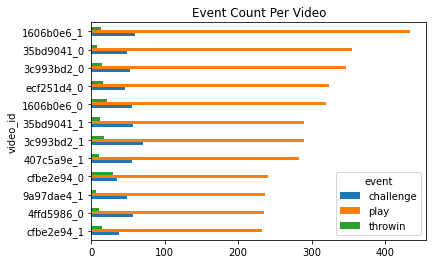

In [6]:
train.query('event not in ["start","end"]') \
    .groupby('video_id')['event'].value_counts().unstack() \
    .sort_values('play') \
    .plot(kind='barh', title='Event Count Per Video')
plt.show

In [7]:
train.groupby(['event_id', 'event'])['time'].mean().unstack()

event,challenge,end,play,start,throwin
event_id,,,,,
0,201.150,202.765822,NaN,200.265822,NaN
1,210.870,212.624111,NaN,210.124111,NaN
2,NaN,220.350213,NaN,217.850213,219.230
3,NaN,226.430850,224.430,223.930850,NaN
4,NaN,231.455367,229.390,228.955367,NaN
...,...,...,...,...,...
3735,NaN,3043.126523,3041.347,3040.626523,NaN
3736,NaN,NaN,3051.707,3049.497881,NaN
3737,3056.587,3053.744023,NaN,3055.572895,NaN


In [8]:
train.query('video_id == "1606b0e6_0"') \
    .sort_values('time').head(15)

,video_id,time,event,event_attributes,event_id
0,1606b0e6_0,200.265822,start,NaN,0
1,1606b0e6_0,201.150000,challenge,['ball_action_forced'],0
2,1606b0e6_0,202.765822,end,NaN,0
3,1606b0e6_0,210.124111,start,NaN,1
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed'],1
5,1606b0e6_0,212.624111,end,NaN,1
6,1606b0e6_0,217.850213,start,NaN,2
7,1606b0e6_0,219.230000,throwin,['pass'],2
8,1606b0e6_0,220.350213,end,NaN,2
9,1606b0e6_0,223.930850,start,NaN,3


In [9]:
train['frame'] = train['time'] * fps
train['frame_round'] = train['frame'].round().astype('int')

In [10]:
video_id = "1606b0e6_0"
frame = 0

In [19]:
cap = cv2.VideoCapture('./data/train/1606b0e6_0.mp4')
ret, img = cap.read()
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)
video_frames = train.query('video_id == @video_id')['frame_round'].max()
max_event_frame = train.query('video_id == @video_id')['frame_round'].max()
for frame in trange(video_frames):
    if ret == False:
        break
        
    frame_data = train.query('video_id == @video_id and frame_round == @frame').copy()
    if len(frame_data) != 0:
        if frame_data['event'].values[0] == 'start':
            event_id = frame_data['event_id'].values[0]
            print(frame_data)
            break
    frame += 1
    ret, img = cap.read()
cap.release()

25.0


  7%|▋         | 12016/180884 [00:54<12:46, 220.28it/s]

     video_id        time  event event_attributes  event_id         frame  \
0  1606b0e6_0  200.265822  start              NaN         0  12015.949315   

   frame_round  
0        12016  


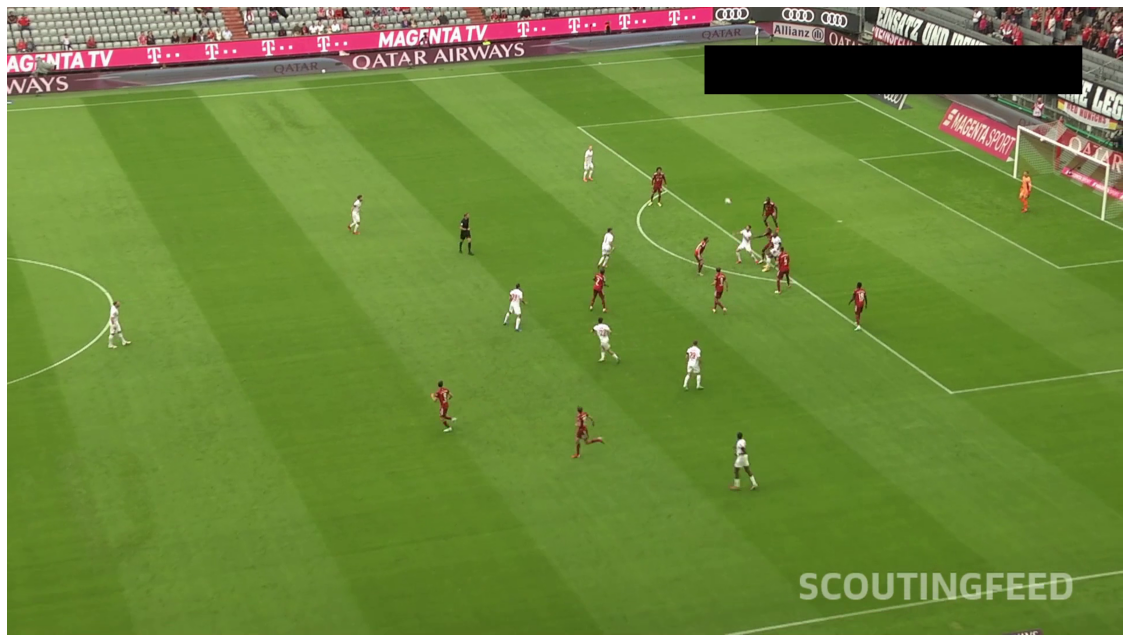

In [18]:
fig, ax = plt.subplots(figsize=(20,20))

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [14]:
write = cv2.VideoWriter('')

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'VideoWriter'
> Overload resolution failed:
>  - VideoWriter() missing required argument 'fourcc' (pos 2)
>  - VideoWriter() missing required argument 'apiPreference' (pos 2)
>  - VideoWriter() missing required argument 'fourcc' (pos 2)
>  - VideoWriter() missing required argument 'apiPreference' (pos 2)


In [15]:
frame_data = frame_data.values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
frame_data

In [ ]:
if frame_data['event'] == 'start':
    print(frame_data)